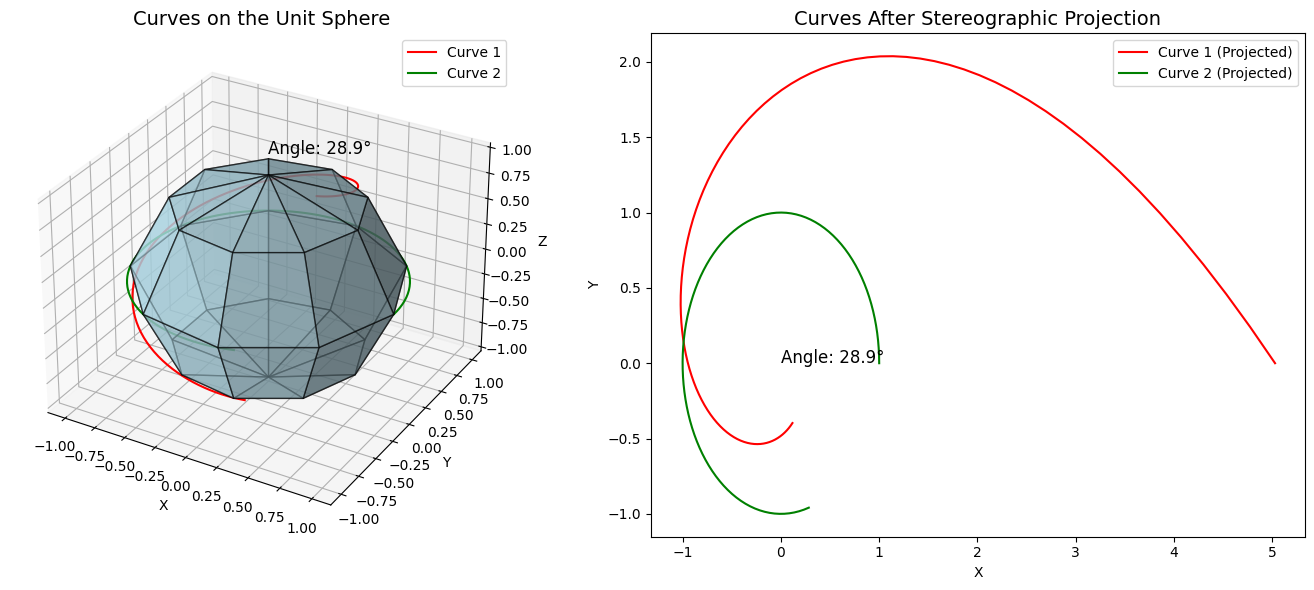

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the stereographic projection
def stereographic_projection(x, y, z):
    X = x / (1 - z)
    Y = y / (1 - z)
    return X, Y

#Define parameterized curves on the sphere
def curve1(t):
    # Example curve: Spiralling equator
    x =  np.cos(t)*np.sin(np.pi/8 + np.pi/8*t)       #intersection when t = 1
    y = np.sin(t)*np.sin(np.pi/8 + np.pi/8*t)
    z = np.cos(np.pi/8 + np.pi/8*t)
    return x, y, z

def curve2(t):
    # Example curve: Equator
    x = np.cos(t)
    y = np.sin(t)
    z = np.zeros_like(t)
    return x, y, z

def projected_curve1(t):
    x, y, z = curve1(t)
    return stereographic_projection(x,y,z)

def projected_curve2(t):
    x, y, z = curve2(t)
    return stereographic_projection(x, y, z)

# Generate parameterized points
t = np.linspace(0, 5, 100)
x1, y1, z1 = curve1(t)
x2, y2, z2 = curve2(t)

X1, Y1 = projected_curve1(t)
X2, Y2 = projected_curve2(t)



# Generate a 3D mesh of the unit sphere
phi = np.linspace(0, np.pi, 5)  # Polar angle
theta = np.linspace(0, 2 * np.pi, 10)  # Azimuthal angle
phi, theta = np.meshgrid(phi, theta)
x_sphere = np.sin(phi) * np.cos(theta)
y_sphere = np.sin(phi) * np.sin(theta)
z_sphere = np.cos(phi)

# Plotting
fig = plt.figure(figsize=(14, 6))

# Subplot 1: Curves on the 3D unit sphere
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.6, edgecolor='k')
ax1.plot(x1, y1, z1, color='red', label="Curve 1")
ax1.plot(x2, y2, z2, color='green', label="Curve 2")
ax1.set_title("Curves on the Unit Sphere", fontsize=14)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.legend()

# Subplot 2: Curves after stereographic projection
ax2 = fig.add_subplot(122)
ax2.plot(X1, Y1, color='red', label="Curve 1 (Projected)")
ax2.plot(X2, Y2, color='green', label="Curve 2 (Projected)")
ax2.set_title("Curves After Stereographic Projection", fontsize=14)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.legend()

# Calculate angles and annotate
t0 = 20              #index where t=1, the index is 50 since t goes from 0 to 2 with 100 steps
p1 = np.array(curve1(t0))
p2 = np.array(curve2(t0))

# Tangent vectors at a specific point
tangent1_sphere = np.gradient(curve1(t), axis=1)[:, t0]       
tangent2_sphere = np.gradient(curve2(t), axis=1)[:, t0]
angle_sphere = np.arccos(
    np.dot(tangent1_sphere, tangent2_sphere) / 
    (np.linalg.norm(tangent1_sphere) * np.linalg.norm(tangent2_sphere))
) * 180 / np.pi

# Project tangent vectors to the plane
tangent1_plane = np.gradient(projected_curve1(t), axis=1)[:, t0]
tangent2_plane = np.gradient(projected_curve2(t), axis=1)[:, t0]
angle_plane = np.arccos(
    np.dot(tangent1_plane, tangent2_plane) / 
    (np.linalg.norm(tangent1_plane) * np.linalg.norm(tangent2_plane))
) * 180 / np.pi

# Annotate angles
ax1.text(0, 0, 1.2, f"Angle: {angle_sphere:.1f}°", fontsize=12, color='black')
ax2.text(0, 0, f"Angle: {angle_plane:.1f}°", fontsize=12, color='black')

plt.tight_layout()
plt.show()


#make curves that will intersect at a known value of t.

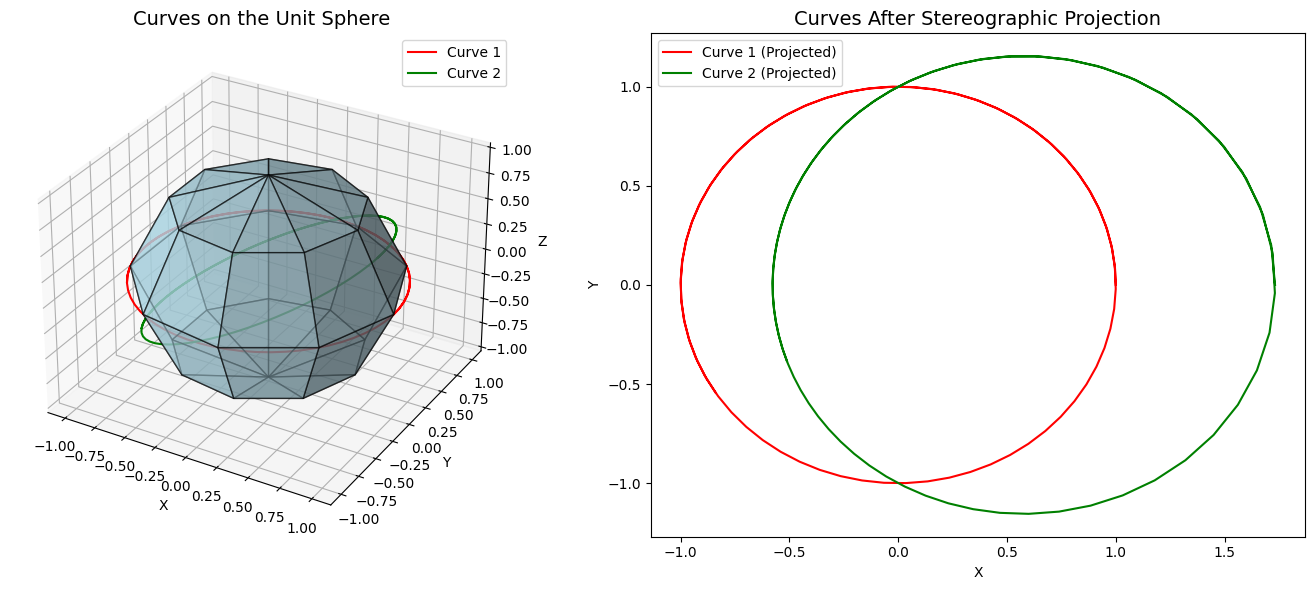

In [2]:
# part b


#define a curve 3 that is another great circle

def curve3(t):
    # Standard great circle (equator)
    x = np.cos(t)
    y = np.sin(t)
    z = np.zeros_like(t)
    
    theta_0= np.pi / 6
    # Apply rotation: tilt by theta_0 (latitude)
    x_rot = np.cos(theta_0) * x - np.sin(theta_0) * z
    y_rot = y  # No change in the y-coordinate for a latitude tilt
    z_rot = np.sin(theta_0) * x + np.cos(theta_0) * z
    
    return x_rot, y_rot, z_rot


def projected_curve3(t):
    x, y, z = curve3(t)
    return stereographic_projection(x, y, z)


# Generate parameterized points
t = np.linspace(0, 10, 100)
x1, y1, z1 = curve2(t)
x2, y2, z2 = curve3(t)

X1, Y1 = projected_curve2(t)
X2, Y2 = projected_curve3(t)



# Generate a 3D mesh of the unit sphere
phi = np.linspace(0, np.pi, 5)  # Polar angle
theta = np.linspace(0, 2 * np.pi, 10)  # Azimuthal angle
phi, theta = np.meshgrid(phi, theta)
x_sphere = np.sin(phi) * np.cos(theta)
y_sphere = np.sin(phi) * np.sin(theta)
z_sphere = np.cos(phi)

# Plotting
fig = plt.figure(figsize=(14, 6))

# Subplot 1: Curves on the 3D unit sphere
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.6, edgecolor='k')
ax1.plot(x1, y1, z1, color='red', label="Curve 1")
ax1.plot(x2, y2, z2, color='green', label="Curve 2")
ax1.set_title("Curves on the Unit Sphere", fontsize=14)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.legend()

# Subplot 2: Curves after stereographic projection
ax2 = fig.add_subplot(122)
ax2.plot(X1, Y1, color='red', label="Curve 1 (Projected)")
ax2.plot(X2, Y2, color='green', label="Curve 2 (Projected)")
ax2.set_title("Curves After Stereographic Projection", fontsize=14)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.legend()

plt.tight_layout()
plt.show()

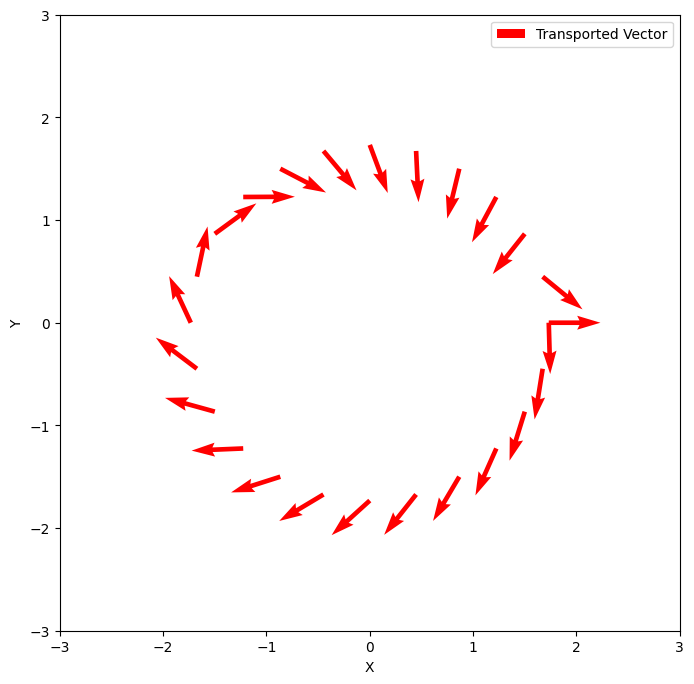

In [57]:

def parallel_transport2(theta0, alpha, beta, steps=25):
    # Create theta points for the geodesic path
    phi = np.linspace(0, np.pi * 2, num = 25)
    delta_t = np.pi/25
    
    # Initialize the transported vector n
    n_theta = alpha
    n_phi = beta

    # Arrays to store vector components along the path
    n_theta_arr = []
    n_phi_arr = []

    # Perform parallel transport along the geodesic
    for t in phi:
        n_theta_arr.append(n_theta)
        n_phi_arr.append(n_phi)

        # Update the vector using the parallel transport equations
        dn_phi = -n_theta * (1/np.tan(theta0)) * delta_t
        dn_theta = n_phi * np.sin(theta0) * np.cos(theta0) * delta_t

        n_phi += dn_phi
        n_theta += dn_theta

    n_theta_arr = np.array(n_theta_arr)
    n_phi_arr = np.array(n_phi_arr)
         

    # Compute the coordinates of the geodesic on the sphere
    x = np.sin(theta0) * np.cos(phi)
    y = np.sin(theta0) * np.sin(phi)
    z = np.cos(theta0)

     # Compute vector components in 3D space, multiplying expressions of unit vectors in Cartesian by coordinates
    vec_x = (np.cos(theta0)*np.cos(phi)* n_theta_arr) + (-np.sin(phi)*n_phi_arr)
    
    vec_y = (np.cos(theta0)*np.sin(phi)* n_theta_arr) + (np.cos(phi)*n_phi_arr)
    
    vec_z = (-np.sin(phi)* n_theta_arr)

    normalize = np.sqrt(vec_x**2+vec_y**2+vec_z**2)*10     #10 is an arbitrary number, I introduced it because I think there are issues when the vector falls off the sphere

    return x, y, z, vec_x/normalize, vec_y/normalize, vec_z/normalize



# Initial conditions
alpha = 1.0   # Component along e_theta
beta = 0.0    # Component along e_phi
theta0 = np.pi / 3  # Initial polar angle
phi0 = 0  # Initial azimuthal angle

# Perform parallel transport
x, y, z, vec_x, vec_y, vec_z = parallel_transport2(theta0, alpha, beta)


x_proj, y_proj = stereographic_projection(x, y, z)

#to project the vectors, we really need to project the points the vectors point to, because the coordinates change as we move around the circle

vx_temp, vy_temp = stereographic_projection(x+vec_x, y+vec_y, z+vec_z)

vec_projx = vx_temp - x_proj
vec_projy = vy_temp - y_proj

norm = np.sqrt(vec_projx**2 + vec_projy**2)
vec_projx /= norm
vec_projy /= norm



# Plot the results
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

# Plot the transported vector along the path
ax.quiver(x_proj, y_proj, vec_projx, vec_projy, angles='xy', scale_units='xy', scale=2, color='red', label='Transported Vector')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.legend()
plt.show()


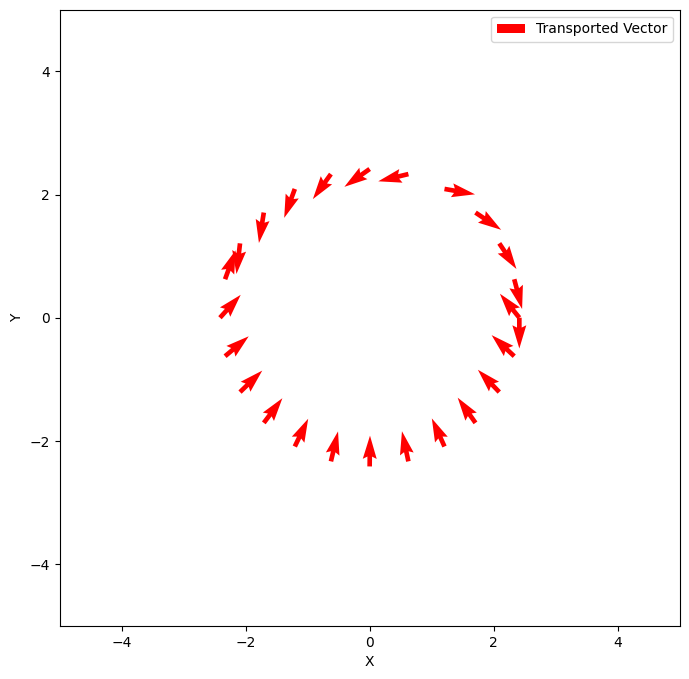

In [58]:
#now another initial condition:

# Initial conditions
alpha = 0.0   # Component along e_theta
beta = -0.5   # Component along e_phi
theta0 = np.pi / 4  # Initial polar angle
phi0 = 0  # Initial azimuthal angle

# Perform parallel transport
x, y, z, vec_x, vec_y, vec_z = parallel_transport2(theta0, alpha, beta)


x_proj, y_proj = stereographic_projection(x, y, z)

#to project the vectors, we really need to project the points the vectors point to, because the coordinates change as we move around the circle

vx_temp, vy_temp = stereographic_projection(x+vec_x, y+vec_y, z+vec_z)

vec_projx = vx_temp - x_proj
vec_projy = vy_temp - y_proj

norm = np.sqrt(vec_projx**2 + vec_projy**2)
vec_projx /= norm
vec_projy /= norm



# Plot the results
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

# Plot the transported vector along the path
ax.quiver(x_proj, y_proj, vec_projx, vec_projy, angles='xy', scale_units='xy', scale=2, color='red', label='Transported Vector')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.legend()
plt.show()

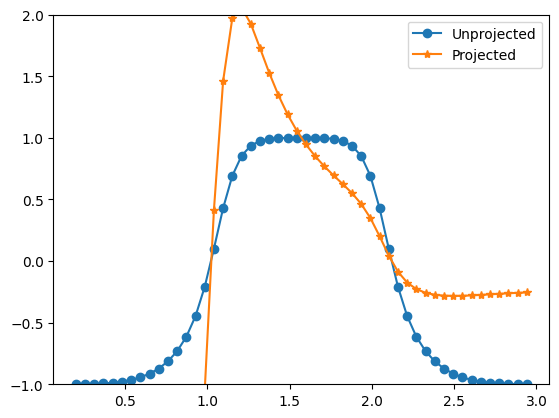

In [67]:
#d) Now doing this for multiple different values for theta0

def innerprod(vx1, vy1, vz1, vx2, vy2, vz2):
    return vx1*vx2 + vy1*vy2 + vz1*vz2 

IP_list = []
IPproj_list = []

thetavals = np.linspace(0.2, np.pi - 0.2)

for th0 in thetavals:
    # Initial conditions
    alpha = 0.0   # Component along e_theta
    beta = -0.5   # Component along e_phi
    theta0 = th0 # Initial polar angle
    phi0 = 0  # Initial azimuthal angle

    # Perform parallel transport
    x, y, z, vec_x, vec_y, vec_z = parallel_transport2(theta0, alpha, beta)


    x_proj, y_proj = stereographic_projection(x, y, z)

    #to project the vectors, we really need to project the points the vectors point to, because the coordinates change as we move around the circle

    vx_temp, vy_temp = stereographic_projection(x+vec_x, y+vec_y, z+vec_z)

    vec_projx = (vx_temp - x_proj) #reintrodcing the 10 we divide out earlier
    vec_projy = (vy_temp - y_proj)


    IP = innerprod(vec_x[0], vec_y[0], vec_z[0], vec_x[-1], vec_y[-1], vec_z[-1])        #innerproducting the initial vector with the end result
    IP_list.append(IP)
    IPproj = innerprod(vec_projx[0], vec_projy[0], 0, vec_projx[-1], vec_projy[-1], 0,)
    IPproj_list.append(IPproj)


plt.plot(thetavals, IP_list, marker = 'o', label='Unprojected')
plt.plot(thetavals, IPproj_list, marker = '*' , label='Projected')
plt.ylim(-1,2)
plt.legend()
plt.show()
    

Looking at the above plot, the stereographic projection clearly doesn't conserve inner products. This is because angles are conserved, but not necessarily lengths. The trend makes sense because at small theta values, things get projected very far away.  I checked that the angles were indeed preserved by normalizing all my vectors, and then I got equal inner products.



f)
Holonomy only depends on the angles between the paralle transported vectors, so the stereographic projection does not alter any holonomy.